# Scatter plot - zależność ilości zakażeń, ilości osób zmarłych oraz gęstością zaludnienia na danym obszarze

Dane o gęstości zaludnienia i ilości ludności -  *Powierzchnia i ludność w przekroju terytorialnym w 2020 roku* - źródło: GUS

Dane o ilości osób zmarłych i zakażonych COVID-19: *COVID-19 w Polsce - zbiór danych stworzony przez Michała Rogalskiego*

In [1]:
df <- data.frame(wojewodztwo = c("Dolnośląskie", "Kujawsko-pomorskie", "Lubelskie", "Lubuskie", "Łódzkie", "Małopolskie", "Mazowieckie", "Opolskie", "Podkarpackie", "Podlaskie", "Pomorskie", "Śląskie", "Świetokrzyskie", "Warmińsko-mazurskie", "Wielkopolskie", "Zachodniopomorskie"),
                 liczba_mieszkancow = c(2900163, 2072373, 2108270, 1011592, 2454779, 3410901, 5423168, 982626, 2127164, 1178353, 2343928, 4517635, 1233961, 1422737, 3498733, 1696193),
                 gestosc_zaludnienia = c(145, 115, 84, 72, 135, 225, 153, 104, 119, 58, 128, 366, 105, 59, 117, 74),
                 liczba_zachorowan = c(62231, 48744, 44086, 18701, 58505, 89939, 105528, 25443, 47067, 23151, 48724, 177902, 27188, 25803, 86940, 31379),
                 ilosc_zgonow = c(936, 510, 820, 280, 738, 1625, 1715, 521, 1027, 387, 683, 1878, 493, 347, 1300, 358), stringsAsFactors=FALSE)

In [2]:
df$ilosc_zachorowan_na_mln_mieszkancow <- df$liczba_zachorowan / df$liczba_mieszkancow *10^6
df$ilosc_zgonow_na_mln_mieszkancow <- df$ilosc_zgonow / df$liczba_mieszkancow *10^6

In [3]:
head(df)

,wojewodztwo,liczba_mieszkancow,gestosc_zaludnienia,liczba_zachorowan,ilosc_zgonow,ilosc_zachorowan_na_mln_mieszkancow,ilosc_zgonow_na_mln_mieszkancow
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Dolnośląskie,2900163,145,62231,936,21457.76,322.7405
2,Kujawsko-pomorskie,2072373,115,48744,510,23520.86,246.0947
3,Lubelskie,2108270,84,44086,820,20910.98,388.9445
4,Lubuskie,1011592,72,18701,280,18486.70,276.7914
5,Łódzkie,2454779,135,58505,738,23833.10,300.6381
6,Małopolskie,3410901,225,89939,1625,26368.11,476.4137


In [4]:
library(dplyr)

df_labeled <- df %>% 
  mutate(label_for_plot = ifelse(
      ilosc_zachorowan_na_mln_mieszkancow %in% c(min(ilosc_zachorowan_na_mln_mieszkancow), max(ilosc_zachorowan_na_mln_mieszkancow)) |
      ilosc_zgonow_na_mln_mieszkancow %in% c(min(ilosc_zgonow_na_mln_mieszkancow), max(ilosc_zgonow_na_mln_mieszkancow)),
      wojewodztwo, "")) 

df_labeled


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




wojewodztwo,liczba_mieszkancow,gestosc_zaludnienia,liczba_zachorowan,ilosc_zgonow,ilosc_zachorowan_na_mln_mieszkancow,ilosc_zgonow_na_mln_mieszkancow,label_for_plot
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Dolnośląskie,2900163,145,62231,936,21457.76,322.7405,
Kujawsko-pomorskie,2072373,115,48744,510,23520.86,246.0947,
Lubelskie,2108270,84,44086,820,20910.98,388.9445,
Lubuskie,1011592,72,18701,280,18486.70,276.7914,
Łódzkie,2454779,135,58505,738,23833.10,300.6381,
Małopolskie,3410901,225,89939,1625,26368.11,476.4137,
Mazowieckie,5423168,153,105528,1715,19458.74,316.2358,
Opolskie,982626,104,25443,521,25892.86,530.2119,Opolskie
Podkarpackie,2127164,119,47067,1027,22126.64,482.8025,


Saving 6.67 x 6.67 in image



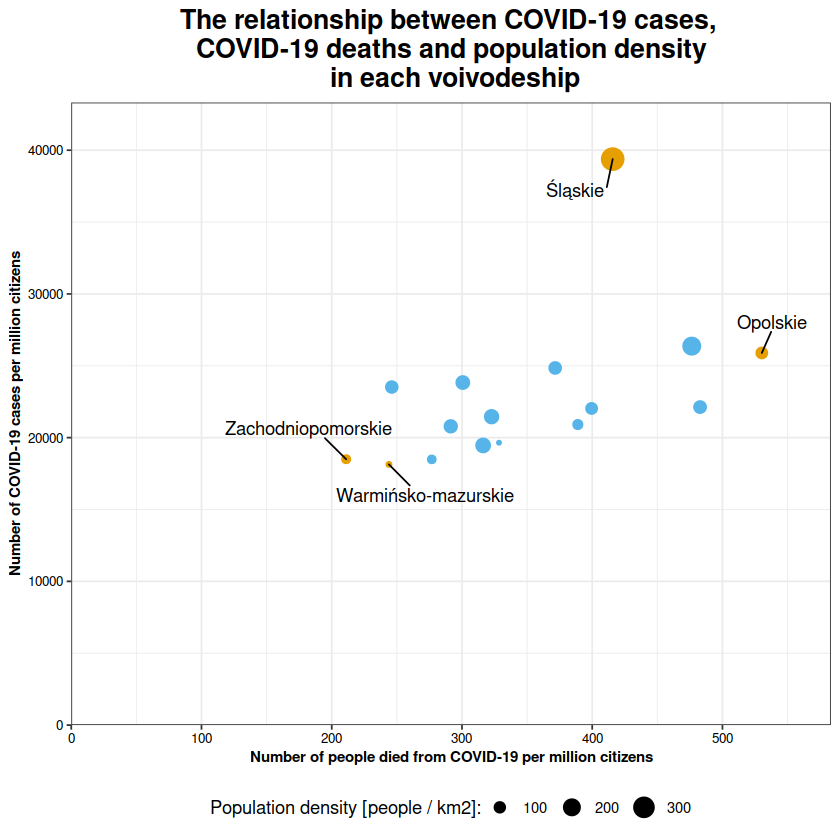

In [5]:
library(ggplot2)
library(ggrepel)
library(ggthemes)

#library(repr)
#options(repr.plot.width=10, repr.plot.height=10)

ggplot(df_labeled, aes(x = ilosc_zgonow_na_mln_mieszkancow, y = ilosc_zachorowan_na_mln_mieszkancow, label = label_for_plot)) +
  geom_point(stroke = 0.5, aes(size = gestosc_zaludnienia), color = ifelse(df_labeled$label_for_plot != "", "#E69F00", "#56B4E9")) +
  geom_text_repel(min.segment.length = 0, seed = 42, box.padding = 1) +
  xlab("Number of people died from COVID-19 per million citizens") +
  ylab("Number of COVID-19 cases per million citizens") +
  ggtitle("The relationship between COVID-19 cases, \n COVID-19 deaths and population density \n in each voivodeship") +
  labs(size = "Population density [people / km2]:") +
  scale_x_continuous(expand = c(0, 0), limits = c(0, max(df$ilosc_zgonow_na_mln_mieszkancow) * 1.1)) + 
  scale_y_continuous(expand = c(0, 0), limits = c(0, max(df$ilosc_zachorowan_na_mln_mieszkancow) * 1.1)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, color = "black", size = 16, face = "bold"),
       legend.position="bottom",
       axis.text = element_text(color = "black", size = 8),
       axis.title = element_text(color = "black", size = 9, face = "bold"))

ggsave("scatter_plot.jpg")